## TØ2
I denne notebook skal du lære

* selv at skrive nogle funktioner

* at arbejde med vektorer og regne på arbejdet en konservativ kraft udfører på et legeme, der bevæger sig ad en vej

### Load kursets Lennard-Jones modul

In [ ]:
%load_ext autoreload
%autoreload 2

import os
if not os.path.exists('python23'):
    !git clone https://github.com/uniblender/python23.git/ > git_output.txt
else:
    os.chdir('python23')
    !git pull 
    os.chdir('../')
!pip install --upgrade pip    
!pip install python23/utils_package/ > pip_output.txt

### Øvelse 1
Her er kode til at lave et lærred:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=16)
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
ax.set_xlim([-1,5])
ax.set_ylim([0,3])
ax.set_xticks(range(-2,6))
ax.set_yticks(range(0,4))
ax.grid()

For at kunne slippe nemt om med alle de ekstra settings ovenfor skal du nu skrive en funktion, der modtager matplotlibs `Axes` objekt, `ax`, som argument og udfører følgende kommandoer:

    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim([-1,5])
    ax.set_ylim([0,3])
    ax.set_xticks(range(-2,6))
    ax.set_yticks(range(0,4))
    ax.grid()


In [ ]:
def grid_med_mere(ax):
    # din kode her

fig, ax = plt.subplots()
grid_med_mere(ax)

Skriv en funktion, der opretter et nyt lærred. Her tænkes på matplotlibs `Figure`-objekt, med et sæt akser, matplotlibs `Axes`-objekt (sådan som det gøres i cellerne ovenfor, hver gang der står `fig, ax =`). Funktionen skal returnere de to objekter.

In [ ]:
def ny_figur():
    # din kode her
    grid_med_mere(ny_ax)
    return ny_fig, ny_ax
fig, ax = ny_figur()

Kør næste celle for at danne et molekyle med tre atomer. Der bruges positionerne:
$\left[\begin{array}{c}-0.5\\1.5\end{array}\right],
\left[\begin{array}{c}1\\2.5\end{array}\right]\>\mathrm{og}\>
\left[\begin{array}{c}1\\0.5\end{array}\right].
$

In [ ]:
from utils.lennard_jones import Atom, Atoms
p = [-0.5, 1.5]
atom1 = Atom(p, color='pink')
p = [1, 2.5]
atom2 = Atom(p, color='C0')
p = [1, 0.5]
atom3 = Atom(p,color='C1')
molecule = Atoms([atom1, atom2, atom3])

Skriv en funktion, der plotter alle atomer i et molekyle. Funktionen skal modtage `Axes`-objektet samt `Atoms`-objektet. Kig i Notebook 1 hvis du har glemt hvordan man plotter atomer.

In [ ]:
def plot_atoms(ax, molecule):
    for atom # din kode her
        # mere af din kode her
fig, ax = ny_figur()
plot_atoms(ax, molecule)

Skriv en funktion, der plotter kræfterne for alle atomer. Funktionen skal modtage `Axes`-objektet samt `Atoms`-objektet. Den skal endvidere holde styr på alle pile, der tegnes og returnere en liste med dem.

In [ ]:
def plot_kraefter(<DIN_KODE_HER>, color='k'):
    positions = molecule.get_positions()
    forces = molecule.get_forces()
    arrows = # færdiggør så der laves en tom liste
    for pos,force in zip(positions,forces):
        arrow = ax.arrow(pos[0], pos[1], force[0], force[1], width=.05, length_includes_head=True, color=color, zorder=200)
        arrows. # færdiggør koden med append-metoden så listen forlænges med arrow
    return arrows

kraft_pile = plot_kraefter(ax, molecule)
fig

Da vi har holdt styr på alle kraft-pilene kan vi loope over dem og fjern dem med denne kode:

In [ ]:
for kraft_pil in kraft_pile:
    kraft_pil.remove()
fig

### Øvelse 2
Nu skal vi tjekke hvad vekselvirkningen mellem to atomer i Lennard-Jones modulet faktisk er.

Start med at skrive en funktion, der:

* modtager en afstand `r` som argument

* opsætter et molekyle bestående af to atomer i afstanden `r`

* returnerer den potentielle energi af molekylet

In [ ]:
def potentiel_energi(r):
    system = # din kode her
    return system.get_potential_energy()

Kald din funktion for forskellige værdier af `r` og plot energien som funktion af netop `r`

In [ ]:
potentielle_energier = []
afstande = # din kode her, der laver liste eller NumPy array af værdier fra 0.85 til 5
for r in afstande:
    # din kode her, der tilføjer den potentielle energi for denne
    # afstand mellem atomerne til listen "potentielle_energier".
    # husk at du lige har skrevet en funktion til at beregne det med

fig, ax = plt.subplots()
ax.plot(afstande, potentielle_energier)

Slå Lennard-Jones potentialet op i Wikipedia og sammenlign med dit plot. 

Omskriv funktionen du skrev ovenfor så den kan håndtere at argumentet `r` er en liste (eller et NumPy array) og ikke blot en skalar. Når du har omskrevet funktionen skal man kunne plotte hele potentialet således: `ax.plot(afstande, potentielle_energier(afstande))`, hvor `afstande` er en liste (eller et NumPy-array).

In [ ]:
def potentielle_energier(afstande):
    liste_af_potentielle_energier = []
    stationaert_atom = Atom([0,0])
    flytbart_atom = Atom([0,0])
    system = Atoms([stationaert_atom, # færdiggør her
    for r in afstande:
        flytbart_atom.set_position # færdiggør her
        liste_af_potentielle_energier.append # færdiggør her
    return liste_af_potentielle_energier

fig, ax = plt.subplots()
ax.plot(afstande, potentielle_energier(afstande))

### Øvelse 3
Nu skal vi tjekke at arbejdet en konservativ kraft udfører er lig minus tilvæksten i potentiel energi. Du skal bruge funktionerne fra øvelse 1.

I de næste celler opbygger vi et plot, der viser kræfterne på atomerne når et af dem trækkes væk fra de to andre. Senere beregner vi det arbejde de to andre atomer udfører på det atom, der flyttes og sammenligner det med tilvæksten i potentiel energi.

Men først plottet, der skal ende med at se således ud:

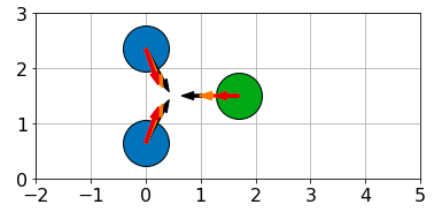

In [ ]:
from utils.lennard_jones import Atom, Atoms
p = [0, 0.65]
atom1 = Atom(p)
p = [0, 2.35]
atom2 = Atom(p)
p = [1.5,1.5]
atom3 = Atom(p,color='C2')
molecule = Atoms([atom1, atom2, atom3])

fig, ax = ny_figur()
plot_atoms(ax, molecule)
kraft_pile = plot_kraefter(ax, molecule, color='k')

Flyt 3. atom 0.1 i x-retningen og plot igen kræfterne (jeg bruger funktionen fra øvelse 1 ovenfor til at plotte kræfterne med). 

In [ ]:
x0 = # skriv værdi
y0 = # skriv værdi
atom3.set_position([x0, y0])
kraft_pile = plot_kraefter(ax, molecule, color='C1')
fig

Flyt endnu en gang 3. atom 0.1 i x-retningen og plot atter kræfterne

In [ ]:
atom3.set_position( # færdiggør
kraft_pile = plot_kraefter(ax, molecule, color='C3')
fig

Okay, nu har vi en god idé om hvordan kræfterne opfører sig. Kraften på 3. atom peger altid i -$x$-retningen når vi trækker atomer til højre.

Vi kan dermed beregne arbejdet kraft fra de to andre atomer på det 3. atom når det flyttes til højre som:
$$W=\int\vec{F}\cdot d\vec{s}=\int F_x dx\simeq \sum F_x(x,y_0) \Delta x$$
Skriv nedenstående celle færdig så den beregner det udførte arbejde når tredje atom flyttes fra $x_0=1.5$ til $x_1=10$.

In [ ]:
x0 = 1.5
y0 = 1.5
atom3.set_position([x0, y0])

e0 = # din kode til at beregne den potentielle energi før flytningen

x1 = 10
Delta_x = 0.001
xs = np.arange(x0, x1, Delta_x)
W = 0

for x in xs:
    atom3.set_position([x, y0])
    forces = molecule.get_forces()
    force_last_atom = # din kode til at få krafter
    fx = # din kode til at få x-komposanten af denne kraft
    W += fx * Delta_x

e1 = # din kode til at beregne den potentielle energi efter flytningen
aendring_i_potentiel_energi = e1 - e0

W, aendring_i_potentiel_energi

Lad os starte forfra

In [ ]:
p = [0, 0.65]
atom1 = Atom(p)
p = [0, 2.35]
atom2 = Atom(p)
p = [1.5,1.5]
atom3 = Atom(p,color='C2')
molecule = Atoms([atom1, atom2, atom3])

fig, ax = ny_figur()
plot_atoms(ax, molecule)
kraft_pile = plot_kraefter(ax, molecule)

Denne gang flyttes det 3. atom i y-retningen.

Du skal få dette plot:

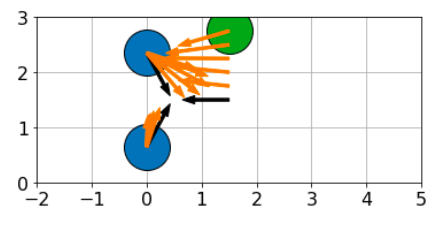

In [ ]:
x0 = 1.5
for y0 in np.arange(1.75,3,0.25):

    # din kode her
fig

Denne gang når vi trækker 3. atom opad er kraften på det primært i -$x$-retningen men der er også komposanter i $y$-retningen

Da bevægelsen sker i $y$-retningen bliver arbejdet de to andre atomer udfører på det 3. atom når det flyttes opad til:
$$W=\int\vec{F}\cdot d\vec{s}=\int F_y dy\simeq \sum F_y(x_0,y) \Delta y$$
Skriv nedenstående celle færdig så den beregner det udførte arbejde når tredje atom flyttes fra $y_0=1.5$ til $y_1=10$.

In [ ]:
x0 = 1.5
y0 = 1.5
atom3.set_position([x0, y0])

e0 = molecule.get_potential_energy()

y1 = 10
Delta_y = 0.001
ys = np.arange(y0, y1, Delta_y)
sum_fy_dy = 0
for y in ys:
    atom3.set_position([x0, y])
    # dine kode
    fy = # dine kode
    sum_fy_dy +=  fy * Delta_y
    
e1 = molecule.get_potential_energy()
sum_fy_dy, e1 - e0

Vi starter forfra en sidste gang:

In [ ]:
p = [0, 0.65]
atom1 = Atom(p)
p = [0, 2.35]
atom2 = Atom(p)
p = [1.5,1.5]
atom3 = Atom(p,color='C2')
molecule = Atoms([atom1, atom2, atom3])

fig, ax = ny_figur()
plot_atoms(ax, molecule)
kraft_pile = plot_kraefter(ax, molecule)

Men denne gang skal det sidste atom flyttes skråt opad i en vinkel på 75$^\circ$ til $x$-aksen. Således at du får dette plot:

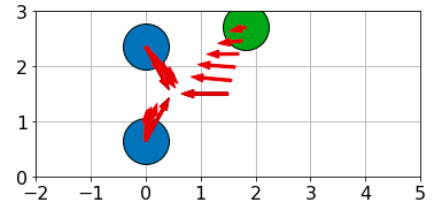

In [ ]:
theta = 75 / 180 * np.pi
dx = np.cos(theta)
dy = np.sin(theta)
ds_vector = np.array([dx,dy])
x0 = 1.5
y0 = 1.5
for s in np.arange(0,1.5,0.25):
    p = np.array([x0, y0]) + # din kode her
    atom3.set_position(p)

    plot_kraefter(ax, molecule, color='C3')

fig

Da bevægelsen nu sker i en generel retning må vi finde kraftens projektion på denne regning (det er ikke længere blot en af komposanterne).

Vi har:
$$F_s=\vec{F}\cdot \hat{s}$$
hvor $\hat{s}$ er retningsvektoren i $d\vec{s}$'s retning.

Derefter har vi:
$$W=\int\vec{F}\cdot d\vec{s}=\int F_s ds\simeq \sum F_s \Delta s$$
Skriv nedenstående celle færdig så den beregner det udførte arbejde når tredje atom flyttes fra i alt 10 længdeenheder i $\hat{s}$-retningen.

In [ ]:
x0 = 1.5
y0 = 1.5
atom3.set_position([x0, y0])

e0 = molecule.get_potential_energy()

integral_of_fs_ds = 0
ds = 0.001
for s in np.arange(0,10,ds):
    p = np.array([x0, y0]) + # din kode her
    atom3.set_position(p)

    forces = molecule.get_forces()
    force_atom3 = # færdiggør her
    
    integral_of_fs_ds += # din kode her

e1 = molecule.get_potential_energy()

integral_of_fs_ds, e1 - e0    